In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
x = df.iloc[:, 1:]
y = df.iloc[:, :1]

y_binary = (y > 14).astype(int)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_binary, test_size=0.3)

## Rede neural

In [4]:
model = Sequential()

model.add(Dense(10, activation='relu', input_dim=12))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

c:\Users\paulo\Documents\Projetos\Inteligencia computacional\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.fit(x_train, y_train, epochs=1000, batch_size=10, verbose=0)

In [6]:
y_pred = (model.predict(x_test) > 0.5).astype(int)

print(classification_report(y_test, y_pred, target_names=["Baixo teor alcólico", "alto teor alcólico"]))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
                     precision    recall  f1-score   support

Baixo teor alcólico       0.92      0.92      0.92        49
 alto teor alcólico       0.20      0.20      0.20         5

           accuracy                           0.85        54
          macro avg       0.56      0.56      0.56        54
       weighted avg       0.85      0.85      0.85        54



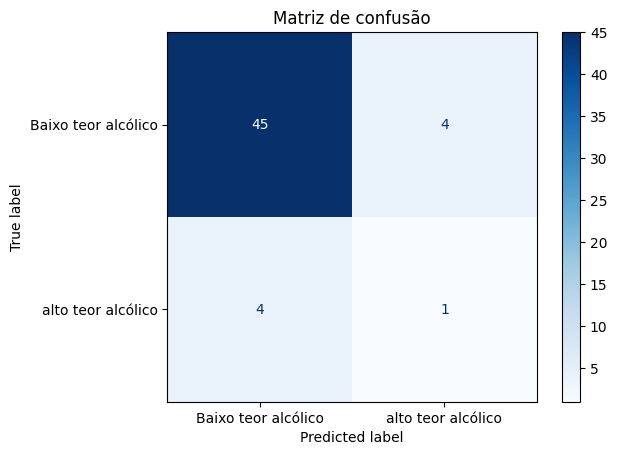

In [7]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Baixo teor alcólico", "alto teor alcólico"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de confusão")
plt.show()